## Groundwater observations

This notebook introduces how to use the `hydropandas` package to read, process and visualise groudnwater data.

## Content<a id=top></a>
1. [GroundwaterObs](#GroundwaterObs)
2. [ObsCollection](#ObsCollection)
3. [Reading ObsCollections](#readingOC)

In [1]:
import hydropandas as hpd
from IPython.display import HTML

## GroundwaterObs<a id=GroundwaterObs></a>
The observations package has several functions to read groundwater observations at a measurement well. These include reading data from:
- dino (from csv-files or using the dinoloket api).
- wiski (dumps from the wiski database)

In [2]:
# reading a dino csv file
fname = r'../tests/data/2019-Dino-test/Grondwaterstanden_Put/B33F0080001_1.csv'
gw = hpd.GroundwaterObs.from_dino(fname=fname, verbose=True)

reading -> B33F0080001_1.csv


In [3]:
# reading the same data using the DINO api
gw = hpd.GroundwaterObs.from_dino(location='B33F0080')

Now we have an `GroundwaterObs` object named `gw`. This object contains all the available information of measurement well 'B33F0080' and filternumber 1. A `GroundwaterObs` object inherits from a pandas `DataFrame` and has the same attributes and methods.

In [4]:
gw

,stand_m_tov_nap,remarks
1972-11-28,5.76,None
1972-12-07,5.77,None
1972-12-14,5.70,None
1972-12-21,5.64,None
1972-12-28,5.57,None
...,...,...
2020-02-07,5.74,Diver
2020-02-07,5.74,Diver
2020-02-07,5.74,Diver
2020-02-07,5.74,Diver


In [5]:
print(gw.columns)

Index(['stand_m_tov_nap', 'remarks'], dtype='object')


In [6]:
gw.describe()

,stand_m_tov_nap
count,51068.000000
mean,5.569022
std,0.218401
min,4.900000
25%,5.390000
50%,5.580000
75%,5.720000
max,6.400000


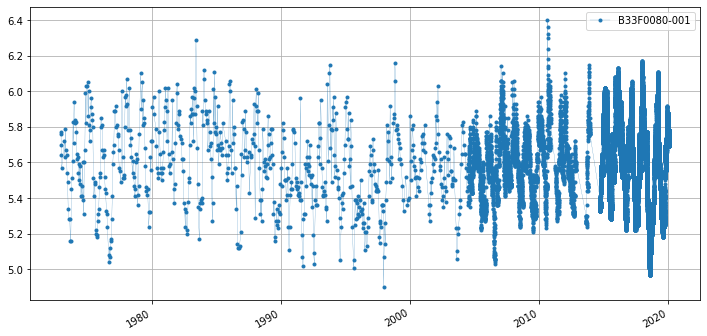

In [35]:
ax = gw['stand_m_tov_nap'].plot(label=gw.name, legend=True, figsize=(12,6), grid=True, marker='.', lw=0.2)

#### GroundwaterObs Attributes

Besides the standard `DataFrame` attributes a `GroundwaterObs` has the following additional attributes:
- x and y, x- and y-coördinate of the observation point
- name, str with the name
- meta, dictionary with additional metadata
- filename, str with the filename (only available when the data was loaded from a file)
- locatie, the name for the location of the observation point.
- filternr, the number of the filter. The combination of locatie and filternr should be unique
- bovenkant_filter, the top of the filter
- onderkant_filter, the bottom of the filter
- maaiveld, surface level
- meetpunt, the top of the well
- metadata_available, boolean indicating whether metadata is available for this observation point

When dowloading from Dinoloket all levels are in meters NAP.

In [7]:
print(f'x = {gw.x}')
print(f'y = {gw.y}')
print(f'name = {gw.name}')
print(f'meta = {gw.meta}')
print(f'filename = {gw.filename}')
print(f'locatie = {gw.locatie}')
print(f'filternr = {gw.filternr}')
print(f'bovenkant_filter = {gw.bovenkant_filter}')
print(f'onderkant_filter = {gw.onderkant_filter}')
print(f'maaiveld = {gw.maaiveld}')
print(f'meetpunt = {gw.meetpunt}')
print(f'metadata_available = {gw.metadata_available}')

x = 213260
y = 473900
name = B33F0080-001
meta = {'topDepthMv': 3.05, 'bottomDepthMv': 4.05, 'diver': 'TRUE', 'startDate': '1972-11-28', 'endDate': '2020-02-07', 'headCount': 51068, 'clusterId': None, 'clusterList': None, 'stCount': 2, 'saCount': 1, 'crs': 'RD', 'startDepthNap': 3.85, 'endDepthNap': -12.15, 'startDepthMv': 3.05, 'endDepthMv': 19.05, 'startDateLevels': '1972-11-28', 'endDateLevels': '2020-02-07', 'startDateSamples': '1972-10-18', 'endDateSamples': '1972-10-18'}
filename = 
locatie = B33F0080
filternr = 1
bovenkant_filter = 3.85
onderkant_filter = 2.85
maaiveld = 6.9
meetpunt = nan
metadata_available = True


#### GroundwaterObs methods

Besides the standard `DataFrame` methods a `GroundwaterObs` has additional methods. This methods are accessible through submodules:
- `geo.get_lat_lon()`, to obtain latitude and longitude
- `gwobs.get_modellayer()`, to obtain the modellayer of a modflow model using the filter depth
- `stats.get_seasonal_stat()`, to obtain seasonal statistics
- `stats.obs_per_year()`, to obtain the number of observations per year
- `stats.consecutive_obs_years()`, to obtain the number of consecutive years with more than a minimum number of observations
- `plots.interactie_plot()`, to obtain a bokeh plot





In [36]:
print(f'latitude and longitude gw.geo.get_lat_lon() -> {gw.geo.get_lat_lon()}')

latitude and longitude gw.geo.get_lat_lon() -> (52.25005804860698, 6.240361161188879)


In [37]:
gw.stats.get_seasonal_stat(stat="mean")

,winter_mean,summer_mean
B33F0080-001,5.719546,5.415028


In [38]:
p= gw.plots.interactive_plot('figure')
HTML(filename="figure\{}.html".format(gw.name))

## ObsCollections<a id=ObsCollections></a>

`ObsCollections` are a combination of multiple observation objects such as `GroundwaterObs` objects. The easiest way to construct an `ObsCollections` is from a list of observation objects.

In [39]:
fname1 = r'../tests/data/2019-Dino-test/Grondwaterstanden_Put/B33F0080001_1.csv'
fname2 = r'../tests/data/2019-Dino-test/Grondwaterstanden_Put/B33F0133001_1.csv'
gw1 = hpd.GroundwaterObs.from_dino(fname=fname1, verbose=False)
gw2 = hpd.GroundwaterObs.from_dino(fname=fname2, verbose=False)

# create ObsCollection
oc = hpd.ObsCollection.from_list([gw1, gw2], name='Dino groundwater')
oc

,x,y,filename,locatie,filternr,bovenkant_filter,onderkant_filter,maaiveld,meetpunt,metadata_available,obs
name,,,,,,,,,,,
B33F0080-001,213260.0,473900.0,../tests/data/2019-Dino-test/Grondwaterstanden...,B33F0080,1.0,3.85,2.85,6.92,7.18,True,locatie filternummer stand_cm_t...
B33F0133-001,210400.0,473366.0,../tests/data/2019-Dino-test/Grondwaterstanden...,B33F0133,1.0,-67.50,-70.00,6.50,7.14,True,locatie filternummer stand_cm_t...


Now we have an `ObsCollection` object named `oc`. The `ObsCollection` contains all the data from the two `GroundwaterObs` objects. It also stores a reference to the `GroundwaterObs` objects in the 'obs' column. Just like a `GroundwaterObs` object and `ObsCollection` object inherits from a pandas `DataFrame` and has the same attributes and methods.

In [40]:
# get columns
oc.columns

Index(['x', 'y', 'filename', 'locatie', 'filternr', 'bovenkant_filter',
       'onderkant_filter', 'maaiveld', 'meetpunt', 'metadata_available',
       'obs'],
      dtype='object')

In [41]:
# get statistics
oc.describe()

,x,y,filternr,bovenkant_filter,onderkant_filter,maaiveld,meetpunt
count,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000
mean,211830.000000,473633.000000,1.0,-31.825000,-33.575000,6.710000,7.160000
std,2022.325394,377.595021,0.0,50.452069,51.512729,0.296985,0.028284
min,210400.000000,473366.000000,1.0,-67.500000,-70.000000,6.500000,7.140000
25%,211115.000000,473499.500000,1.0,-49.662500,-51.787500,6.605000,7.150000
50%,211830.000000,473633.000000,1.0,-31.825000,-33.575000,6.710000,7.160000
75%,212545.000000,473766.500000,1.0,-13.987500,-15.362500,6.815000,7.170000
max,213260.000000,473900.000000,1.0,3.850000,2.850000,6.920000,7.180000


In [42]:
# get individual GroundwaterObs object from an ObsCollection
o = oc.loc['B33F0133-001', 'obs']
o

,locatie,filternummer,stand_cm_tov_mp,stand_cm_tov_mv,stand_cm_tov_nap,bijzonderheid,opmerking,stand_m_tov_nap,meetpunt
1989-12-14,B33F0133,1,582.0,530.0,120.0,NaN,NaN,1.20,7.02
1990-01-15,B33F0133,1,545.0,493.0,157.0,NaN,NaN,1.57,7.02
1990-01-29,B33F0133,1,532.0,480.0,170.0,NaN,NaN,1.70,7.02
1990-02-14,B33F0133,1,549.0,497.0,153.0,NaN,NaN,1.53,7.02
1990-03-01,B33F0133,1,546.0,494.0,156.0,NaN,NaN,1.56,7.02
...,...,...,...,...,...,...,...,...,...
2011-01-14,B33F0133,1,357.0,293.0,357.0,NaN,NaN,3.57,7.14
2011-01-15,B33F0133,1,354.0,290.0,360.0,NaN,NaN,3.60,7.14
2011-01-16,B33F0133,1,353.0,289.0,361.0,NaN,NaN,3.61,7.14
2011-01-17,B33F0133,1,353.0,289.0,361.0,NaN,NaN,3.61,7.14


#### ObsCollection Attributes

An `ObsCollection` also has additional attributes:
- name, a str with the name of the collection
- meta, a dictionary with additional metadata

In [43]:
print(f'name is -> {oc.name}')
print(f'meta is -> {oc.meta}')

name is -> Dino groundwater
meta is -> {}


#### ObsCollection methods
Besides the methods of a pandas `DataFrame` an `ObsCollection` has additional methods stored in submodules.

`geo`:
- `get_bounding_box` -> get a tuple with (xmin, ymin, xmax, ymax)
- `get_extent` -> get a tule with (xmin, xmax, ymin, ymax)
- `get_lat_lon` -> to get the lattitudes and longitudes from the x and y coördinates
- `within_polygon` -> to select only the observations that lay within a polygon

`gwobs`:
- `set_filter_num` -> to set the filternumbers based on the filter depth when there are multiple filters at one location
- `set_filter_num_location` -> find out which observations are at the same location with a different filter depth. Set locatie and filternr attributes accordingly.

`plots`:
- `interactive_figures` -> create bokeh figures for each observation point.
- `interactive_map` -> create a folium map with observation points and bokeh figures for each observation point.

`stats`:
- `get_first_last_obs_date()` -> get the first and the last date of the observations for each observation point
- `get_no_of_observations()` -> get the number of observations
- `get_seasonal_stat()` -> get seasonal stats of the observations

In [44]:
print(f'bounding box geo.get_bounding_box() -> {oc.geo.get_bounding_box()}')

bounding box geo.get_bounding_box() -> (210400.0, 473366.0, 213260.0, 473900.0)


In [45]:
oc.geo.set_lat_lon()
oc.plots.interactive_map(plot_dir='figure')

## Reading ObsCollections<a id=readingOC></a>

Instead of creating the ObsCollection from a list of observation objects. It is also possible to read the data from a source into an ObsCollection at once. The following sources can be read as an ObsCollection:
- dino (from files or the api of dinoloket)
- fews (dumps from the fews database)
- wiski (dumps from the wiski database)
- arctic (a Mongo database)
- menyanthes (a .men file)
- modflow (from the heads of a modflow model)
- imod (from the heads of an imod model)

This notebook won't go into detail on all the sources that can be read. Only the two options for reading data from Dinoloket are shown below.

In [46]:
# read using the DINO api
extent = [117850, 117980, 439550, 439700]  # Schoonhoven zuid-west
dino_gw = hpd.ObsCollection.from_dino(extent=extent, keep_all_obs=False, verbose=False, cache=True)
dino_gw

,x,y,filename,locatie,filternr,bovenkant_filter,onderkant_filter,maaiveld,meetpunt,metadata_available,obs
name,,,,,,,,,,,
B38B0206-001,117893,439652,,B38B0206,1,-2.04,-3.04,-0.08,NaN,True,stand_m_tov_nap remarks 1985-03-28...
B38B0206-002,117893,439652,,B38B0206,2,-14.00,-15.00,-0.08,NaN,True,stand_m_tov_nap remarks 1985-03-28...
B38B0207-001,117960,439670,,B38B0207,1,NaN,-38.67,-0.87,NaN,True,stand_m_tov_nap remarks 1985-02-28...


In [47]:
# read using a .zip file with data
dinozip = r'../tests/data/2019-Dino-test/dino.zip'
dino_gw = hpd.ObsCollection.from_dino(dirname=dinozip, keep_all_obs=False, verbose=False)
dino_gw

,x,y,filename,locatie,filternr,bovenkant_filter,onderkant_filter,maaiveld,meetpunt,metadata_available,obs
name,,,,,,,,,,,
B02H0092-001,219890.0,600030.0,C:\Users\oebbe\AppData\Local\Temp\tmp9xgen9hp\...,B02H0092,1.0,NaN,NaN,NaN,NaN,True,locatie filternummer stand_cm_t...
B02H1007-001,219661.0,600632.0,C:\Users\oebbe\AppData\Local\Temp\tmp9xgen9hp\...,B02H1007,1.0,NaN,NaN,1.92,NaN,True,locatie filternummer stand_cm_t...
B33F0080-001,213260.0,473900.0,C:\Users\oebbe\AppData\Local\Temp\tmp9xgen9hp\...,B33F0080,1.0,3.85,2.85,6.92,7.18,True,locatie filternummer stand_cm_t...
B33F0080-002,213260.0,473900.0,C:\Users\oebbe\AppData\Local\Temp\tmp9xgen9hp\...,B33F0080,2.0,-10.15,-12.15,6.92,7.17,True,locatie filternummer stand_cm_t...
B33F0133-001,210400.0,473366.0,C:\Users\oebbe\AppData\Local\Temp\tmp9xgen9hp\...,B33F0133,1.0,-67.50,-70.00,6.50,7.14,True,locatie filternummer stand_cm_t...
B33F0133-002,210400.0,473366.0,C:\Users\oebbe\AppData\Local\Temp\tmp9xgen9hp\...,B33F0133,2.0,-104.20,-106.20,6.50,7.12,True,locatie filternummer stand_cm_t...
B42B0003-001,38165.0,413785.0,C:\Users\oebbe\AppData\Local\Temp\tmp9xgen9hp\...,B42B0003,1.0,-2.00,-3.00,6.50,6.99,True,locatie filternummer stand_cm_t...
B42B0003-002,38165.0,413785.0,C:\Users\oebbe\AppData\Local\Temp\tmp9xgen9hp\...,B42B0003,2.0,-34.00,-35.00,6.50,6.99,True,locatie filternummer stand_cm_t...
B42B0003-003,38165.0,413785.0,C:\Users\oebbe\AppData\Local\Temp\tmp9xgen9hp\...,B42B0003,3.0,-60.00,-61.00,6.50,6.95,True,locatie filternummer stand_cm_t...
